In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)

In [3]:
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

In [5]:
data.columns = header

In [6]:
data.index = [1,2,3,4,5,6,7,8,9,10,11]

In [7]:
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1        10.0   8.04      10.0  9.14      10.0   7.46       8.0   6.58
2         8.0   6.95       8.0  8.14       8.0   6.77       8.0   5.76
3        13.0   7.58      13.0  8.74      13.0  12.74       8.0   7.71
4         9.0   8.81       9.0  8.77       9.0   7.11       8.0   8.84
5        11.0   8.33      11.0  9.26      11.0   7.81       8.0   8.47
6        14.0   9.96      14.0  8.10      14.0   8.84       8.0   7.04
7         6.0   7.24       6.0  6.13       6.0   6.08       8.0   5.25
8         4.0   4.26       4.0  3.10       4.0   5.39      19.0  12.50
9        12.0  10.84      12.0  9.13      12.0   8.15       8.0   5.56
10        7.0   4.82       7.0  7.26       7.0   6.42       8.0   7.91
11        5.0   5.68       5.0  4.74       5.0   5.73       8.0   6.89

In [8]:
#data.to_latex('hola.tex')

In [9]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


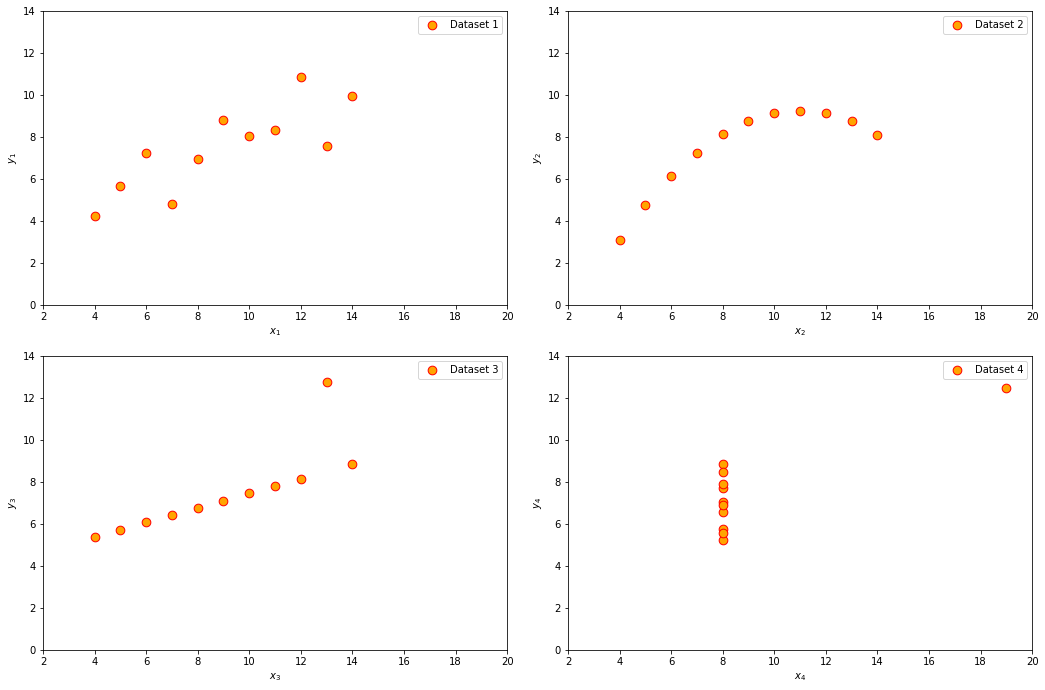

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(pad=3.0)

parametros = {'marker':'o', 'c':'orange', 'edgecolor':'red', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros)
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros)
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros)
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred, linear_regressor

[[0.50009091]]
[[0.5]]
[[0.49972727]]
[[0.49990909]]


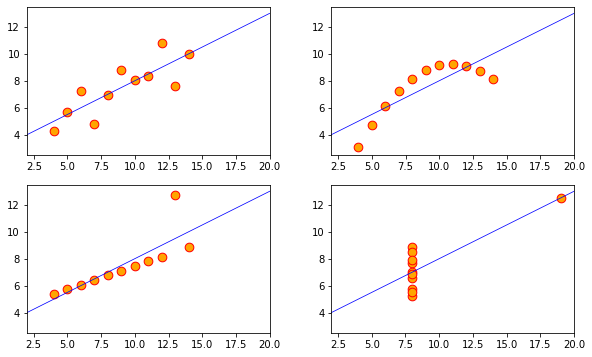

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

coeficientes = []
i = 0
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred,aux = regresionLineal(data, i)
        coeficientes.append(aux.coef_)
        print(aux.coef_)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        i += 2

### (A) Su punto de vista del artículo mencionado en el punto 1 (particularmente de la sección 3)

De acuerdo con las nociones presentadas en un inicio, cabe recalcar que existían diferentes tecnologías que limitaban los avances de las investigaciones (a mi parecer), motivo por el cual posiblemente en 1973 no fuese tan exacto el uso de gráficos, sin embargo, es algo que actualmente nos ayuda bastante a comprender diversos comportamientos de los datos de una manera más “amigable”. Tampoco comparto la idea de que exista sólo un camino para un correcto análisis, pues a mi parecer, existen diversas formas en que se pueden explotar y analizar los datos. 


Referente al punto 3, me parece que expresa la idea de cómo es que los datos atípicos logran afectar nuestros análisis, sin embargo, hay que tener en cuenta que no siempre tendremos datos ajustados “perfectamente”, pues como se menciona, se elimina Alaska, ¿y luego? ¿Se continua eliminando datos infinitamente? Me parece que existen diversos métodos para trabajar con dichos datos, sin embargo, me pregunto si es lo adecuado, pues a fin de cuentas son datos obtenidos, y tendrán sus motivos, pienso que se debería investigar su origen y la importancia que tienen dentro del análisis.

### (B) Realizar los cálculos descritos en la transparencia 11 de la presentación Intro. a la Vis. (página 11); 

In [14]:
import statistics as stats

In [15]:
m_x  = []
var_x = []
m_y = []
var_y = []
corr = []
linear_reg = [] 
coef_det = []

In [16]:
m_x.append(stats.mean(data['$x_1$']))
m_x.append(stats.mean(data['$x_2$']))
m_x.append(stats.mean(data['$x_3$']))
m_x.append(stats.mean(data['$x_4$']))

m_y.append(stats.mean(data['$y_1$']))
m_y.append(stats.mean(data['$y_2$']))
m_y.append(stats.mean(data['$y_3$']))
m_y.append(stats.mean(data['$y_4$']))

In [17]:
var_x.append(stats.pvariance(data['$x_1$']))
var_x.append(stats.pvariance(data['$x_2$']))
var_x.append(stats.pvariance(data['$x_3$']))
var_x.append(stats.pvariance(data['$x_4$']))

var_y.append(stats.pvariance(data['$y_1$']))
var_y.append(stats.pvariance(data['$y_2$']))
var_y.append(stats.pvariance(data['$y_3$']))
var_y.append(stats.pvariance(data['$y_4$']))

In [18]:
k=0
for i in m_x:
    print("Para la serie",k+1)
    print("La media de x =",i)
    print("La varianza de x = ",var_x[k])
    print("La media de y =",m_y[k])
    print("La varianza de y =",var_y[k])
    print("Con coeficiente = ",coeficientes[k])
    print()
    k+=1

Para la serie 1
La media de x = 9.0
La varianza de x =  10.0
La media de y = 7.500909090909091
La varianza de y = 3.752062809917356
Con coeficiente =  [[0.50009091]]

Para la serie 2
La media de x = 9.0
La varianza de x =  10.0
La media de y = 7.500909090909091
La varianza de y = 3.752390082644628
Con coeficiente =  [[0.5]]

Para la serie 3
La media de x = 9.0
La varianza de x =  10.0
La media de y = 7.5
La varianza de y = 3.747836363636364
Con coeficiente =  [[0.49972727]]

Para la serie 4
La media de x = 9.0
La varianza de x =  10.0
La media de y = 7.500909090909091
La varianza de y = 3.7484082644628103
Con coeficiente =  [[0.49990909]]



In [19]:
print("Los coeficientes de correlación son:")
data.corr()

Los coeficientes de correlación son:


,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
$x_1$,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
$y_1$,0.816421,1.000000,0.816421,0.750005,0.816421,0.468717,-0.529093,-0.489116
$x_2$,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
$y_2$,0.816237,0.750005,0.816237,1.000000,0.816237,0.587919,-0.718437,-0.478095
$x_3$,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
$y_3$,0.816287,0.468717,0.816287,0.587919,0.816287,1.000000,-0.344661,-0.155472
$x_4$,-0.500000,-0.529093,-0.500000,-0.718437,-0.500000,-0.344661,1.000000,0.816521
$y_4$,-0.314047,-0.489116,-0.314047,-0.478095,-0.314047,-0.155472,0.816521,1.000000
